Model

In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.optimize as opt;

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Lets define our true model

In [12]:
def trueYvsX(x,m=1,b=1):
    return m*x+b

In [27]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
plt.plot(xs,ys,'ro')

x = np.linspace(0,10,100)
plt.plot(x,trueYvsX(x),"k:")

# OK Lets generate some data according to this model 
Start out by assuming:
  - No measurement error in X
  - Uncorrelated uncertianties of 0.1 in Y
  - no systematics uncertianties


In [36]:
def getData(sigmaY=0.5):
    xs = []
    ys = []
    for i in range(10):
        xs.append(i)
        ys.append(trueYvsX(i))
        ye_s.append(trueYvsX(i)*0.1)
    return xs,ys

In [98]:
def getData2(sigmaY=0.5):
    xs = np.linspace(-5,5,11)
    ys = trueYvsX(xs) + np.random.normal(0,sigmaY,len(xs))
    eys = np.full(len(xs),sigmaY)
    return xs,ys,eys

In [99]:
np.full(10,0.5)


array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [118]:
data_x, data_y, errors_y = getData2(sigmaY=0.5)

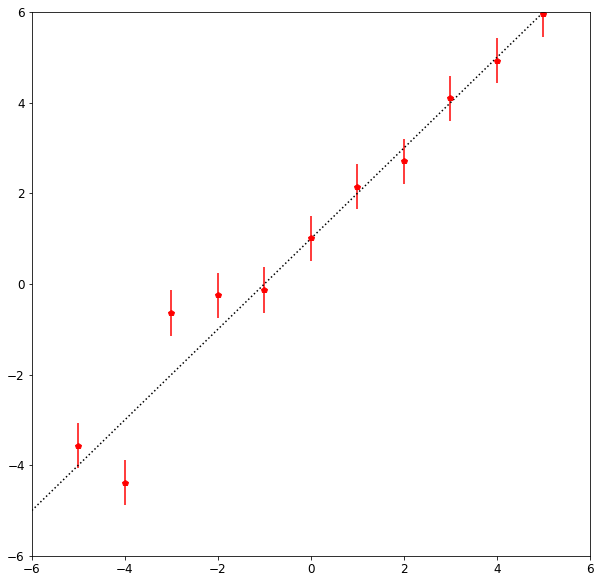

In [119]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
plt.errorbar(data_x,data_y,yerr=errors_y,color="r",ls='',marker="p")

x = np.linspace(-6,6,100)
plt.plot(x,trueYvsX(x),"k:")

In [120]:
# This is the function we are trying to fit to the data.
def fitFun(x, p0, p1):
    return p0*x+p1

def ff(x, p):
    return fitFun(x,*p)

def errFun(p, x, y):
    return fitFun(p, x) - y 

In [121]:
p0 = [ 0, 0]
fitResults = opt.curve_fit(fitFun, data_x, data_y, sigma=errors_y, p0=p0)

In [122]:
fitResults

(array([0.97516174, 1.07846722]), array([[4.55949750e-03, 1.56452804e-10],
        [1.56452804e-10, 4.55949755e-02]]))

In [126]:
fitResults[0][0]
fitResults[1][0][0]

0.0045594975046203065

# Lets make some pulls

In [143]:
p0_pulls = []
p1_pulls = []
p0_truth = 1 
p1_truth = 1

for i in range(1000):
    data_x, data_y, errors_y = getData2(sigmaY=0.5)
    p0 = [ 0, 0]
    fitResults = opt.curve_fit(fitFun, data_x, data_y, sigma=errors_y, p0=p0)
    p0_fit = fitResults[0][0]
    p0_err = np.sqrt(fitResults[1][0])
    
    p0_fit = fitResults[0][0]
    p0_err = np.sqrt(fitResults[1][0][0])
    p0_pull = (p0_fit - p0_truth)/p0_err
    p0_pulls.append(p0_pull)

    p1_fit = fitResults[0][1]
    p1_err = np.sqrt(fitResults[1][1][1])
    p1_pull = (p1_fit - p1_truth)/p1_err
    p1_pulls.append(p1_pull)

/Users/johnda/python-virtual-environments/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


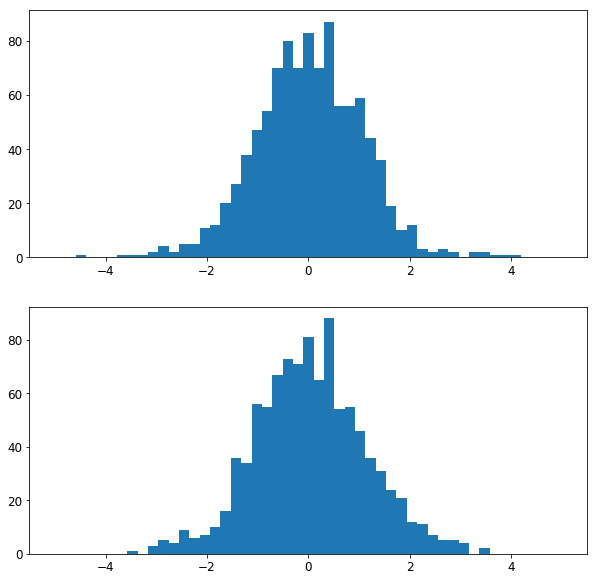

In [149]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(10,10))


ax1.hist(p0_pulls,bins=np.linspace(-5,5,50))
ax2.hist(p1_pulls,bins=np.linspace(-5,5,50))

plt.show()

# Ok now lets move to Bkg model and systematics

In [321]:
nPoints = 51
x_min = -25
x_max = 25
y_err = 0.5

def bkgModel(x,m=1,b=0):
    return m*x+b

def trueYvsX(x,m=1,b=0):
    return m*x+b

In [322]:
def getData2(sigmaY=0.5):
    xs = np.linspace(x_min,x_max,nPoints)
    ys = trueYvsX(xs) + np.random.normal(0,sigmaY,len(xs))
    eys = np.full(len(xs),sigmaY)
    return xs,ys,eys

In [337]:
data_x, data_y, errors_y = getData2(sigmaY=y_err)

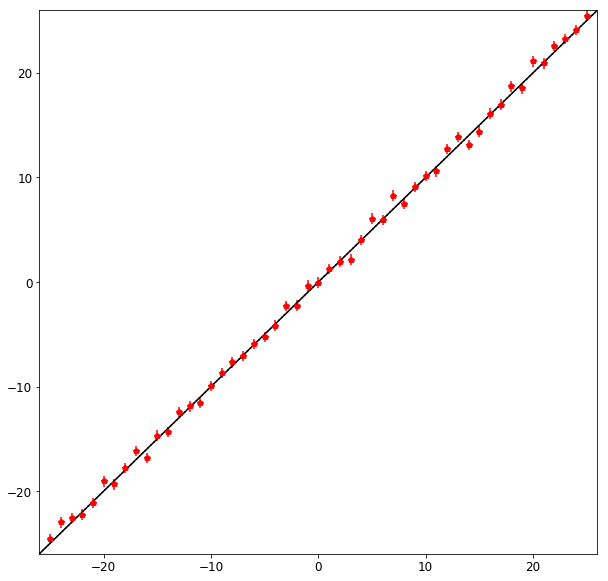

In [338]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((x_min-1, x_max+1))
ax.set_ylim((x_min-1, x_max+1))
plt.errorbar(data_x,data_y,yerr=errors_y,color="r",ls='',marker="p")

x = np.linspace(x_min-1, x_max+1,100)
plt.plot(x,trueYvsX(x),"k:")
plt.plot(x,bkgModel(x),"k")

## Method 1: Taking residuals as systematic

In [339]:
residualsUP = data_y - bkgModel(data_x)
residualsDown = bkgModel(data_x) - data_y

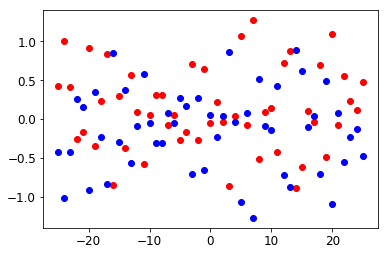

In [340]:
plt.plot(data_x,residualsUP,"ro")
plt.plot(data_x,residualsDown,"bo")

In [341]:
def bkgModelFull_v1(x,p0):
    mNominal = 1
    return mNominal*x+p0*residualsUP

In [342]:
def getBkgToy_v1(p0=0,sigmaY=0.5):
    xs = np.linspace(x_min,x_max,nPoints)
    ys = bkgModelFull_v1(xs,p0) + np.random.normal(0,sigmaY,len(xs))
    eys = np.full(len(xs),sigmaY)
    return xs,ys,eys

In [350]:
toyData_x, toyData_y, toyErrors_y = getBkgToy_v1(p0=0,sigmaY=y_err)

In [351]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((x_min-1, x_max+1))
ax.set_ylim((x_min-1, x_max+1))
plt.errorbar(toyData_x,toyData_y,yerr=toyErrors_y,color="r",ls='',marker="p")

x = np.linspace(x_min-1, x_max+1,100)
#plt.plot(x,trueYvsX(x),"k:")
plt.plot(toyData_x,bkgModelFull_v1(toyData_x,0),"k")
plt.plot(toyData_x,bkgModelFull_v1(toyData_x,-1),"k:")
plt.plot(toyData_x,bkgModelFull_v1(toyData_x,+1),"k:")


#plt.plot(x,bkgModelFull_v1(x,-1),"k:")
#plt.plot(x,bkgModelFull(x,+1),"k:")

In [352]:
p0 = [0]
fitResults = opt.curve_fit(bkgModelFull_v1, toyData_x, toyData_y, sigma=toyErrors_y, p0=p0)
p0_fit, p0_err = getFitParamAndError(fitResults,0)

In [353]:
p0_fit,p0_err

(-0.07046112841891568, 0.1292217519396989)

In [354]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((x_min-1, x_max+1))
ax.set_ylim((x_min-1, x_max+1))
plt.errorbar(toyData_x,toyData_y,yerr=toyErrors_y,color="r",ls='',marker="p")

x = np.linspace(x_min-1, x_max+1,100)
#plt.plot(x,trueYvsX(x),"k:")
plt.plot(toyData_x,bkgModelFull_v1(toyData_x,0),"k")
plt.plot(toyData_x,bkgModelFull_v1(toyData_x,-1),"k:")
plt.plot(toyData_x,bkgModelFull_v1(toyData_x,+1),"k:")
plt.plot(toyData_x,bkgModelFull_v1(toyData_x,-0.06577891187454525),"b")


In [435]:
p0_pulls = []

for i in range(10000):
    toy_data_x, toy_data_y, toy_errors_y = getBkgToy(sigmaY=0.5)
    p0 = [ 0]
    fitResults = opt.curve_fit(bkgModelFull_v1, toy_data_x, toy_data_y, sigma=toy_errors_y, p0=p0)
    p0_fit, p0_err = getFitParamAndError(fitResults,0)

    p0_pull = (p0_fit)/1
    p0_pulls.append(p0_pull)
    #p0_pulls.append(p0_fit)

In [436]:
fig, ax = plt.subplots(1, figsize=(10,10))


ax.hist(p0_pulls,bins=np.linspace(-5,5,50))
x_axis = np.linspace(-5,5,50)

binWidth = 10/50
ax.plot(x_axis, 10000*binWidth*norm.pdf(x_axis,0,1),"r:",linewidth=4)
plt.show()

## Method 2: Fitting smooth line

In [357]:
def sysFunction(x, p0, p1):
    return p0*x+p1


In [358]:
p0 = [1,0]
fitResults = opt.curve_fit(sysFunction, data_x, data_y, sigma=errors_y, p0=p0)

In [359]:
def getFitParamAndError(fitRes,pIndex):
    p_fit = fitRes[0][pIndex]
    p_err = np.sqrt(fitResults[1][pIndex][pIndex])
    return p_fit, p_err

In [360]:
p0_fit, p0_err = getFitParamAndError(fitResults,0)
p1_fit, p1_err = getFitParamAndError(fitResults,1)

In [361]:
print("systematic slope",p0_fit,"+/-",p0_err)
print("systematic offset",p1_fit,"+/-",p1_err)

systematic slope 1.0001292286810306 +/- 0.005115129048774336
systematic offset 0.1398131096597653 +/- 0.07529263110227108


Now we throw toys according to background prediction and fit using the full background model

In [405]:
def bkgModelFull_v2(x,p0):
    mSys = 1 + p0*0.005115129048774336
    bSys = 0 #+ p1*0.07529263110227108
    return mSys*x+bSys

In [406]:
def getBkgToy_v2(sigmaY=0.5):
    xs = np.linspace(x_min,x_max,nPoints)
    ys = bkgModelFull_v2(xs,p0=0) + np.random.normal(0,sigmaY,len(xs))
    eys = np.full(len(xs),sigmaY)
    return xs,ys,eys

In [407]:
toyData_x, toyData_y, toyErrors_y = getBkgToy_v2(sigmaY=y_err)

In [408]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((x_min-1, x_max+1))
ax.set_ylim((x_min-1, x_max+1))
plt.errorbar(toyData_x,toyData_y,yerr=toyErrors_y,color="r",ls='',marker="p")

x = np.linspace(x_min-1, x_max+1,100)
#plt.plot(x,trueYvsX(x),"k:")

plt.plot(x,bkgModelFull_v2(x,0),"k")
plt.plot(x,bkgModelFull_v2(x,-1),"k:")
plt.plot(x,bkgModelFull_v2(x,+1),"k:")

#plt.plot(x,bkgModelFull_v2(x,0,0),"k")
#plt.plot(x,bkgModelFull_v2(x,-1,0),"k:")
#plt.plot(x,bkgModelFull_v2(x,+1,0),"k:")
#plt.plot(x,bkgModelFull_v2(x,0,+1),"k:")
#plt.plot(x,bkgModelFull_v2(x,0,-1),"k:")

In [410]:
#p0 = [1,0]
p0 = [1]
fitResults = opt.curve_fit(bkgModelFull_v2, toyData_x, toyData_y, sigma=toyErrors_y, p0=p0)
p0_fit, p0_err = getFitParamAndError(fitResults,0)
#p1_fit, p1_err = getFitParamAndError(fitResults,1)

In [412]:
#print(p0_fit,p0_err,"and",p1_fit,p1_err)
print(p0_fit,p0_err)

0.6898228188561584 1.0917722236935128


## Now lets do it a bunch of times

In [413]:
p0_pulls = []

for i in range(10000):
    toy_data_x, toy_data_y, toy_errors_y = getBkgToy_v2(sigmaY=0.5)
    #p0 = [ 0,0]
    p0 = [ 0]
    fitResults = opt.curve_fit(bkgModelFull_v2, toy_data_x, toy_data_y, sigma=toy_errors_y, p0=p0)
    p0_fit, p0_err = getFitParamAndError(fitResults,0)

    p0_pull = (p0_fit)/1
    p0_pulls.append(p0_pull)


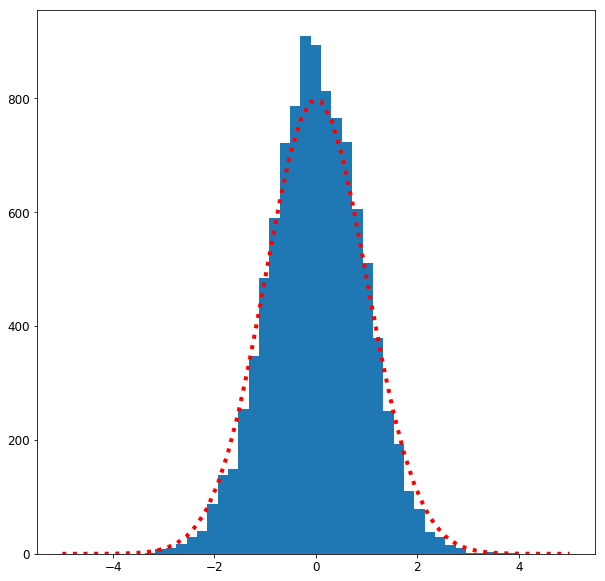

In [433]:
fig, ax = plt.subplots(1, figsize=(10,10))
from scipy.stats import norm


ax.hist(p0_pulls,bins=np.linspace(-5,5,50))
x_axis = np.linspace(-5,5,50)

binWidth = 10/50
ax.plot(x_axis, 10000*binWidth*norm.pdf(x_axis,0,1),"r:",linewidth=4)
plt.show()